## Getting bamCoverage on the trimmed cellranger count bam files

## Run STAR with the same parameters cellranger used
STAR_2.5.1b was used
### Concatenate fastq

In [1]:
import os
from os.path import join, basename, dirname

## File names

In [2]:
genomedir = "/data2/genome/human_GRCh38/cellranger/refdata-cellranger-GRCh38-3.0.0/star"
indir = "/data2/isshamie/mito_lineage/data/processed/200403_A00953_0090_BHC23FDSXY/trim/"

outdir = join(indir, "homebrew/")
if not os.path.exists(outdir):
    os.mkdir(outdir)
outdir = join(outdir, "bam/")
if not os.path.exists(outdir):
    os.mkdir(outdir)

    
ID = "bc5prime_A"
f1 = join(indir,"trimmed_BC_5Prime_031020_A_R1.concat.fastq")
f2 = join(indir,"trimmed_BC_5Prime_031020_A_R2.concat.fastq")

In [3]:
!which STAR

/home/isshamie/software/STAR-2.5.3a/bin/Linux_x86_64/STAR


## Run STAR and dont use R1 for mapping

In [14]:
def star_cmd(genomedir, r1,r2, outdir,ID, math_val=0.1, use_both_reads=False):
    if use_both_reads:
            cmd = f"STAR --runThreadN 8  --genomeDir {genomedir}  --readFilesIn {r1} {r2} --outFileNamePrefix {join(outdir, ID)} --outSAMtype BAM SortedByCoordinate --outWigType bedGraph --readNameSeparator space --outStd Log   --outSAMattrRGline ID:{ID}:0:1:HC23FDSXY:3   SM:{ID} LB:0.1 PU:{ID}:0:1:HC23FDSXY:3 PL:ILLUMINA  --outSAMmultNmax 18446744073709551615"
    else:
        cmd = f"STAR --runThreadN 8  --genomeDir {genomedir}  --readFilesIn {r2} --outFileNamePrefix {join(outdir, ID)} --outSAMtype BAM SortedByCoordinate --outWigType bedGraph --readNameSeparator space --outStd Log   --outSAMattrRGline ID:{ID}:0:1:HC23FDSXY:3   SM:{ID} LB:0.1 PU:{ID}:0:1:HC23FDSXY:3 PL:ILLUMINA  --outSAMmultNmax 18446744073709551615"
    add_params = f" --outFilterScoreMinOverLread {math_val} --outFilterMatchNminOverLread {math_val}"
    cmd = cmd + add_params
    print(cmd)
    
    return cmd

#--readFilesCommand 'gunzip -c'
#--outSAMunmapped Within KeepPairs
#--outSAMorder PairedKeepInputOrder

## A.

In [5]:
indir = "/data2/isshamie/mito_lineage/data/processed/200403_A00953_0090_BHC23FDSXY/trim/"
A1_R1 = "trimmed_A_S1_L001_R1_001.fastq"
A1_R2 = "trimmed_A_S1_L001_R2_001.fastq"
ID = "A"

outdir = "/data2/isshamie/mito_lineage/data/processed/200403_A00953_0090_BHC23FDSXY/trim/bam"
if not os.path.exists(outdir):
    os.mkdir(outdir)

A1_R1 = join(indir,A1_R1)
A1_R2 = join(indir,A1_R2)

### Run STAR with parameters for matching lowered


#cmd = f"STAR --runThreadN 4  --genomeDir {genomedir} --readFilesCommand 'gunzip -c' --readFilesIn {A1_R2} --outFileNamePrefix {join(outdir, ID+'.lowerParams')} -–outSAMtype BAM SortedByCoordinate --outWigType bedGraph --readNameSeparator space --outStd Log --outSAMunmapped Within KeepPairs  --outSAMorder PairedKeepInputOrder --outSAMattrRGline ID:{ID}:0:1:HC23FDSXY:3   SM:{ID} LB:0.1 PU:{ID}:0:1:HC23FDSXY:3 PL:ILLUMINA  --outSAMmultNmax 18446744073709551615"
math_val=0.1
ID = f"{ID}_{math_val:0.1f}"
cmd = star_cmd(genomedir, A1_R1,A1_R2, outdir,ID, math_val=0.1)

# add_params = " --outFilterScoreMinOverLread 0.3 --outFilterMatchNminOverLread 0.3"
# cmd = cmd + add_params
# print(cmd)

!{cmd}

STAR --runThreadN 8  --genomeDir /data2/genome/human_GRCh38/cellranger/refdata-cellranger-GRCh38-3.0.0/star  --readFilesIn /data2/isshamie/mito_lineage/data/processed/200403_A00953_0090_BHC23FDSXY/trim/trimmed_A_S1_L001_R2_001.fastq --outFileNamePrefix /data2/isshamie/mito_lineage/data/processed/200403_A00953_0090_BHC23FDSXY/trim/bam/A_0.1 --outSAMtype BAM SortedByCoordinate --outWigType bedGraph --readNameSeparator space --outStd Log   --outSAMattrRGline ID:A_0.1:0:1:HC23FDSXY:3   SM:A_0.1 LB:0.1 PU:A_0.1:0:1:HC23FDSXY:3 PL:ILLUMINA  --outSAMmultNmax 18446744073709551615 --outFilterScoreMinOverLread 0.1 --outFilterMatchNminOverLread 0.1
May 18 20:58:17 ..... started STAR run
May 18 20:58:17 ..... loading genome
May 18 20:58:26 ..... started mapping
May 18 21:18:15 ..... started sorting BAM
May 18 21:26:51 ..... started wiggle output
May 18 21:31:37 ..... finished successfully


In [5]:
# indir = "/data2/isshamie/mito_lineage/data/processed/200403_A00953_0090_BHC23FDSXY/trim/"
# A1_R1 = "trimmed_A_S1_L001_R1_001.fastq"
# A1_R2 = "trimmed_A_S1_L001_R2_001.fastq"
# ID = "A"

# outdir = "/data2/isshamie/mito_lineage/data/processed/200403_A00953_0090_BHC23FDSXY/trim/bam"
# if not os.path.exists(outdir):
#     os.mkdir(outdir)

# A1_R1 = join(indir,A1_R1)
# A1_R2 = join(indir,A1_R2)

# ### Run STAR with parameters for matching lowered


# #cmd = f"STAR --runThreadN 4  --genomeDir {genomedir} --readFilesCommand 'gunzip -c' --readFilesIn {A1_R2} --outFileNamePrefix {join(outdir, ID+'.lowerParams')} -–outSAMtype BAM SortedByCoordinate --outWigType bedGraph --readNameSeparator space --outStd Log --outSAMunmapped Within KeepPairs  --outSAMorder PairedKeepInputOrder --outSAMattrRGline ID:{ID}:0:1:HC23FDSXY:3   SM:{ID} LB:0.1 PU:{ID}:0:1:HC23FDSXY:3 PL:ILLUMINA  --outSAMmultNmax 18446744073709551615"
# cmd = star_cmd(genomedir, A1_R1,A1_R2, outdir,ID)

# # add_params = " --outFilterScoreMinOverLread 0.3 --outFilterMatchNminOverLread 0.3"
# # cmd = cmd + add_params
# # print(cmd)
# !{cmd}

STAR --runThreadN 8  --genomeDir /data2/genome/human_GRCh38/cellranger/refdata-cellranger-GRCh38-3.0.0/star  --readFilesIn /data2/isshamie/mito_lineage/data/processed/200403_A00953_0090_BHC23FDSXY/trim/trimmed_A_S1_L001_R2_001.fastq --outFileNamePrefix /data2/isshamie/mito_lineage/data/processed/200403_A00953_0090_BHC23FDSXY/trim/bam/A.lowerParams --outSAMtype BAM SortedByCoordinate --outWigType bedGraph --readNameSeparator space --outStd Log   --outSAMattrRGline ID:A:0:1:HC23FDSXY:3   SM:A LB:0.1 PU:A:0:1:HC23FDSXY:3 PL:ILLUMINA  --outSAMmultNmax 18446744073709551615 --outFilterScoreMinOverLread 0.3 --outFilterMatchNminOverLread 0.3
May 18 20:19:02 ..... started STAR run
May 18 20:19:03 ..... loading genome
May 18 20:19:11 ..... started mapping
May 18 20:38:41 ..... started sorting BAM
May 18 20:41:47 ..... started wiggle output
May 18 20:44:23 ..... finished successfully


## AD.

In [13]:
indir = "/data2/isshamie/mito_lineage/data/processed/200403_A00953_0090_BHC23FDSXY/trim/"
AD_R1 = "trimmed_AD_R1_concat.fastq"
AD_R2 = "trimmed_AD_R2_concat.fastq"
ID = "AD"

outdir = "/data2/isshamie/mito_lineage/data/processed/200403_A00953_0090_BHC23FDSXY/trim/bam"
if not os.path.exists(outdir):
    os.mkdir(outdir)

AD_R1 = join(indir,AD_R1)
AD_R2 = join(indir,AD_R2)

### Run STAR with parameters for matching lowered

# cmd = f"STAR --runThreadN 4  --genomeDir {genomedir}  --readFilesIn {AD_R2} --outFileNamePrefix {join(outdir, ID+'.lowerParams')} -–outSAMtype BAM SortedByCoordinate --outWigType bedGraph --readNameSeparator space --outStd Log --outSAMunmapped Within KeepPairs  --outSAMorder PairedKeepInputOrder --outSAMattrRGline ID:{ID}:0:1:HC23FDSXY:3   SM:{ID} LB:0.1 PU:{ID}:0:1:HC23FDSXY:3 PL:ILLUMINA  --outSAMmultNmax 18446744073709551615"

# add_params = " --outFilterScoreMinOverLread 0.3 --outFilterMatchNminOverLread 0.3"
# cmd = cmd + add_params
# print(cmd)

math_val=0.1
ID = f"{ID}_{math_val:0.1f}"
cmd = star_cmd(genomedir, A1_R1,A1_R2, outdir,ID, math_val=0.1)

#cmd = star_cmd(genomedir, AD_R1,AD_R2, outdir,ID)
!{cmd}

STAR --runThreadN 8  --genomeDir /data2/genome/human_GRCh38/cellranger/refdata-cellranger-GRCh38-3.0.0/star  --readFilesIn /data2/isshamie/mito_lineage/data/processed/200403_A00953_0090_BHC23FDSXY/trim/trimmed_A_S1_L001_R2_001.fastq --outFileNamePrefix /data2/isshamie/mito_lineage/data/processed/200403_A00953_0090_BHC23FDSXY/trim/bam/AD_0.1 --outSAMtype BAM SortedByCoordinate --outWigType bedGraph --readNameSeparator space --outStd Log   --outSAMattrRGline ID:AD_0.1:0:1:HC23FDSXY:3   SM:AD_0.1 LB:0.1 PU:AD_0.1:0:1:HC23FDSXY:3 PL:ILLUMINA  --outSAMmultNmax 18446744073709551615 --outFilterScoreMinOverLread 0.1 --outFilterMatchNminOverLread 0.1
May 19 04:55:40 ..... started STAR run
May 19 04:55:40 ..... loading genome
May 19 04:55:51 ..... started mapping
May 19 05:19:38 ..... started sorting BAM
May 19 05:28:32 ..... started wiggle output
May 19 05:34:45 ..... finished successfully


In [15]:
indir = "/data2/isshamie/mito_lineage/data/processed/200403_A00953_0090_BHC23FDSXY/trim/"
AD_R1 = "trimmed_AD_R1_concat.fastq"
AD_R2 = "trimmed_AD_R2_concat.fastq"
ID = "AD_r1r2"

outdir = "/data2/isshamie/mito_lineage/data/processed/200403_A00953_0090_BHC23FDSXY/trim/bam"
if not os.path.exists(outdir):
    os.mkdir(outdir)

AD_R1 = join(indir,AD_R1)
AD_R2 = join(indir,AD_R2)

### Run STAR with parameters for matching lowered

# cmd = f"STAR --runThreadN 4  --genomeDir {genomedir}  --readFilesIn {AD_R2} --outFileNamePrefix {join(outdir, ID+'.lowerParams')} -–outSAMtype BAM SortedByCoordinate --outWigType bedGraph --readNameSeparator space --outStd Log --outSAMunmapped Within KeepPairs  --outSAMorder PairedKeepInputOrder --outSAMattrRGline ID:{ID}:0:1:HC23FDSXY:3   SM:{ID} LB:0.1 PU:{ID}:0:1:HC23FDSXY:3 PL:ILLUMINA  --outSAMmultNmax 18446744073709551615"

# add_params = " --outFilterScoreMinOverLread 0.3 --outFilterMatchNminOverLread 0.3"
# cmd = cmd + add_params
# print(cmd)

math_val=0.1
ID = f"{ID}_{math_val:0.1f}"
cmd = star_cmd(genomedir, A1_R1,A1_R2, outdir,ID, math_val=0.1, use_both_reads=True)

#cmd = star_cmd(genomedir, AD_R1,AD_R2, outdir,ID)
!{cmd}

STAR --runThreadN 8  --genomeDir /data2/genome/human_GRCh38/cellranger/refdata-cellranger-GRCh38-3.0.0/star  --readFilesIn /data2/isshamie/mito_lineage/data/processed/200403_A00953_0090_BHC23FDSXY/trim/trimmed_A_S1_L001_R1_001.fastq /data2/isshamie/mito_lineage/data/processed/200403_A00953_0090_BHC23FDSXY/trim/trimmed_A_S1_L001_R2_001.fastq --outFileNamePrefix /data2/isshamie/mito_lineage/data/processed/200403_A00953_0090_BHC23FDSXY/trim/bam/AD_r1r2_0.1 --outSAMtype BAM SortedByCoordinate --outWigType bedGraph --readNameSeparator space --outStd Log   --outSAMattrRGline ID:AD_r1r2_0.1:0:1:HC23FDSXY:3   SM:AD_r1r2_0.1 LB:0.1 PU:AD_r1r2_0.1:0:1:HC23FDSXY:3 PL:ILLUMINA  --outSAMmultNmax 18446744073709551615 --outFilterScoreMinOverLread 0.1 --outFilterMatchNminOverLread 0.1
May 19 05:34:46 ..... started STAR run
May 19 05:34:47 ..... loading genome
May 19 05:34:58 ..... started mapping
May 19 06:27:17 ..... started sorting BAM
May 19 06:42:26 ..... started wiggle output
May 19 06:51:03 ....

## Run

## Bamcoverage

cmd = "mkdir bamcoverage"
cmd = 'bamCoverage -b bc5prime_fiveprime_A_1/outs/possorted_genome_bam.bam -o bamcoverage/bc5prime_fiveprime_A_1.bw -p 20'
cmd = "bamCoverage -b bc5prime_sc5p_pe_lanes/outs/possorted_genome_bam.bam -o bamcoverage/bc5prime_sc5p_pe_lanes -p 20"

In [16]:
import glob

In [17]:
bamcoverage_dir = join(outdir,"bamcov")
if not os.path.exists(bamcoverage_dir):
    os.mkdir(bamcoverage_dir)
for i in glob.glob(outdir + "/*.bam"):
    cmd =  f"bamCoverage --bam {i} -o {join(bamcoverage_dir,basename(i)+'.bw')} -p 10"
    print(cmd)
    !{cmd}

bamCoverage --bam /data2/isshamie/mito_lineage/data/processed/200403_A00953_0090_BHC23FDSXY/trim/bam/AD_r1r2_0.1Aligned.sortedByCoord.out.bam -o /data2/isshamie/mito_lineage/data/processed/200403_A00953_0090_BHC23FDSXY/trim/bam/bamcov/AD_r1r2_0.1Aligned.sortedByCoord.out.bam.bw -p 10
'/data2/isshamie/mito_lineage/data/processed/200403_A00953_0090_BHC23FDSXY/trim/bam/AD_r1r2_0.1Aligned.sortedByCoord.out.bam' does not appear to have an index. You MUST index the file first!
bamCoverage --bam /data2/isshamie/mito_lineage/data/processed/200403_A00953_0090_BHC23FDSXY/trim/bam/A_0.1Aligned.sortedByCoord.out.bam -o /data2/isshamie/mito_lineage/data/processed/200403_A00953_0090_BHC23FDSXY/trim/bam/bamcov/A_0.1Aligned.sortedByCoord.out.bam.bw -p 10
bamFilesList: ['/data2/isshamie/mito_lineage/data/processed/200403_A00953_0090_BHC23FDSXY/trim/bam/A_0.1Aligned.sortedByCoord.out.bam']
binLength: 50
numberOfSamples: None
blackListFileName: None
skipZeroOverZero: False
bed_and_bin: False
genomeChunkS

## Plot mapq values (take first 60000)

In [6]:
import pandas as pd
import numpy as np
import seaborn as sns
%matplotlib inline

In [7]:
sam_f = "../data/processed/mttrace/A/00_bam/A.sam"
sam = pd.read_csv(sam_f,sep="\t",skiprows=10000,nrows=60000,header=None, comment="@",usecols=np.arange(6))
sam.head()

,0,1,2,3,4,5
0,A00953:90:HC23FDSXY:3:2524:26928:34695,1171,12,122981133,255,101M
1,A00953:90:HC23FDSXY:3:1403:24207:32487,163,12,123428838,255,89M12S
2,A00953:90:HC23FDSXY:3:1403:24207:32487,163,12,123428838,255,89M12S
3,A00953:90:HC23FDSXY:3:1650:16504:6590,163,12,123428838,255,89M12S
4,A00953:90:HC23FDSXY:3:1650:16504:6590,163,12,123428838,255,89M12S


In [9]:
import matplotlib.pyplot as plt

Text(0.5, 1.0, 'MAPQ')

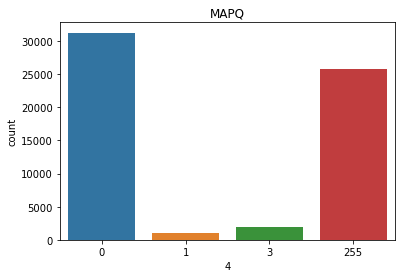

In [10]:
sns.countplot(sam[4])
plt.title("MAPQ")

In [ ]:
Read Name
SAM flag
chromosome (if read is has no alignment, there will be a “*” here)
position (1-based index, “left end of read”)
MAPQ (mapping quality — describes the uniqueness of the alignment, 0=non-unique, >10 probably unique)
CIGAR string (describes the position of insertions/deletions/matches in the alignment, encodes splice junctions, for example)
Name of mate (mate pair information for paired-end sequencing, often “=”)
Position of mate (mate pair information)
Template length (always zero for me)
Read Sequence
Read Quality
Program specific Flags (i.e. AS is an alignment score, NH is a number of reported alignments that contains the query in the current record)

In [15]:
unmapped = sam[sam[4] == 0]
unmapped


,0,1,2,3,4,5
9,A00953:90:HC23FDSXY:3:1275:25473:14700,419,12,124911769,0,15S61M
10,A00953:90:HC23FDSXY:3:1275:25473:14700,419,12,124911769,0,15S61M
19,A00953:90:HC23FDSXY:3:1428:16405:1658,419,12,124911922,0,14S62M
21,A00953:90:HC23FDSXY:3:1275:25473:14700,419,12,124911997,0,15S61M
22,A00953:90:HC23FDSXY:3:2350:10041:20071,419,12,124912052,0,101M
...,...,...,...,...,...,...
59995,A00953:90:HC23FDSXY:3:2171:23737:36245,77,*,0,0,*
59996,A00953:90:HC23FDSXY:3:2171:23737:36245,141,*,0,0,*
59997,A00953:90:HC23FDSXY:3:2202:29722:9972,77,*,0,0,*
59998,A00953:90:HC23FDSXY:3:2202:29722:9972,141,*,0,0,*


In [18]:
print(f"Number of duplicated reads: {unmapped[0].duplicated().sum()}")

Number of duplicated reads: 27094


In [20]:
print(f"Number of reads mapped to *: {(unmapped[2]=='*').sum()}")

Number of reads mapped to *: 5775


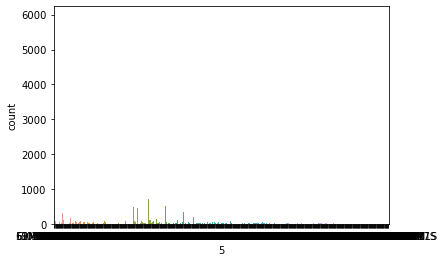

In [21]:
sns.countplot(unmapped[5])

In [35]:
(~sam[sam[4] == 0].duplicated()).sum()

26305

In [37]:
((~sam[sam[4] == 0].duplicated()) & ~(sam[2]=="*")).sum()

20909

In [32]:
sam[(sam[4] == 0) & (sam[2] == "*")]

,0,1,2,3,4,5
54225,A00953:90:HC23FDSXY:3:1102:10755:20744,77,*,0,0,*
54226,A00953:90:HC23FDSXY:3:1102:10755:20744,141,*,0,0,*
54227,A00953:90:HC23FDSXY:3:1104:11912:30671,77,*,0,0,*
54228,A00953:90:HC23FDSXY:3:1104:11912:30671,141,*,0,0,*
54229,A00953:90:HC23FDSXY:3:1104:2166:14043,77,*,0,0,*
...,...,...,...,...,...,...
59995,A00953:90:HC23FDSXY:3:2171:23737:36245,77,*,0,0,*
59996,A00953:90:HC23FDSXY:3:2171:23737:36245,141,*,0,0,*
59997,A00953:90:HC23FDSXY:3:2202:29722:9972,77,*,0,0,*
59998,A00953:90:HC23FDSXY:3:2202:29722:9972,141,*,0,0,*


In [38]:
print("AAGCAGTGGTATCAACGCAGAGTACTGTTTATGGGGTGATGTGAG")

AAGCAGTGGTATCAACGCAGAGTACTGTTTATGGGGTGATGTGAG


In [39]:
print(len("AAGCAGTGGTATCAACGCAGAGTACTGTTTATGGGGTGATGTGAG"))

45


In [43]:
cmd = "cellranger count --id=bc5prime_A_MT_c5p_pe_lanes --fastqs=/data2/isshamie/mito_lineage/data/processed/200403_A00953_0090_BHC23FDSXY/trim_v03 --transcriptome=/data2/isshamie/mito_lineage/external/genome/MT_genome/MT_GRCh38/ --chemistry SC5P-PE --sample trimmed_BC_5Prime_031020_A_1,trimmed_BC_5Prime_031020_A_2,trimmed_BC_5Prime_031020_A_3,trimmed_BC_5Prime_031020_A_4 --localcores 32"
print(cmd)

cellranger count --id=bc5prime_A_MT_c5p_pe_lanes --fastqs=/data2/isshamie/mito_lineage/data/processed/200403_A00953_0090_BHC23FDSXY/trim_v03 --transcriptome=/data2/isshamie/mito_lineage/external/genome/MT_genome/MT_GRCh38/ --chemistry SC5P-PE --sample trimmed_BC_5Prime_031020_A_1,trimmed_BC_5Prime_031020_A_2,trimmed_BC_5Prime_031020_A_3,trimmed_BC_5Prime_031020_A_4 --localcores 32


In [40]:
print(len("AAGCAGTGGTATCAACGCAGAGTAC"))

25
